# Tweet Sentiment Analysis

## Import Statements

In [1]:
from fastai2.text.all import *
# import plotly.express as px

In [2]:
# df = pd.read_csv('training.1600000.processed.noemoticon.csv', 
#             encoding =  "ISO-8859-1", 
#             names = ['target','id', 'date', 'flag', 'user','text' ])

In [3]:
df = pd.read_csv('tweets_500thou.csv', 
#             encoding =  "ISO-8859-1", 
#             names = ['target','id', 'date', 'flag', 'user','text' ]
                )

In [4]:
df.head()

,target,id,date,flag,user,text
0,0,1979717787,Sun May 31 04:13:24 PDT 2009,NO_QUERY,simoune,please drag me to hell
1,0,2056003410,Sat Jun 06 10:20:54 PDT 2009,NO_QUERY,jjx,&gt;. Bodies from Air France crash have been found http://twurl.nl/dvu8be (via @Paisano )
2,4,2044735293,Fri Jun 05 09:45:16 PDT 2009,NO_QUERY,employeeze,"@tithonium Yeah, decided to give it up for my peeps today"
3,4,2064688447,Sun Jun 07 06:55:44 PDT 2009,NO_QUERY,xBeckah,@Danni_denton NOT NICE :| its sunny jealous much!!
4,0,2006624042,Tue Jun 02 11:26:30 PDT 2009,NO_QUERY,coldsnakevenom,Its too hot


## Utilizing out of the box language model from `fastai`

The standard `fastai` language model was build from all the non-trivial Wikipedia articles.

In [5]:
dls = TextDataLoaders.from_df(df, text_col='text', label_col='target', 
                              shuffle_train=False, bs=128)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [6]:
dls.show_batch(n=3)

,text,category
0,xxbos xxunk xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it xxup do xxup it,4
1,xxbos xxunk ? ° xxunk ° xxunk xxunk xxunk ▁ xxunk xxunk ° ì ¦ xxunk xxunk ▁ xxunk xxunk ? ´ xxunk xxunk ° xxunk xxunk … xxunk ì ¿ xxunk ▁ ì ° xxunk xxunk ? ´ xxunk xxunk xxunk ° xxunk ▁ xxunk xxunk xxunk xxunk ° xxunk xxunk  ì ° xxunk ? ´ xxunk xxunk xxunk ▁ xxunk ▁ xxunk ° xxunk … xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4
2,xxbos xxunk xxmaj taylor xxunk -- > # & & $ ( # & & $ ! ( @ # $ ( ! @ # * $ ( # ! ( sweet mother of # xxunk # ( $ * ( ! @ # * $ ( ! @ # & & $ ( ! @ # $ & & ! ( @ # ! # xxunk … my xxunk is only xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0
3,xxbos xxup oh xxup em xxup f'ing g xxrep 4 e i xxup never xxup kne xxrep 3 w ! xxup never xxup would xxup have xxup thought xxup eve xxrep 4 r xxup in xxup my xxup lif xxrep 3 e ! xxup this xxup is s xxrep 4 o xxup crazy i xxup wa xxrep 3 n a xxup fxckin xxup cry xxup lol xxup jk xxup but xxup wow xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0
4,"xxbos xxrep 4 ? , xxrep 6 ? xxrep 9 ? tweetie ? ? xxrep 10 ? xxrep 5 ? direct ' ? ( xxrep 3 ? xxrep 10 ? ) , xxrep 4 ? xxrep 3 ? ? ? xxrep 7 ? ? xxrep 4 ? xxrep 6 ? xxrep 3 ? xxrep 3 ? ? xxrep 4 ? xxrep 3 ? - xxrep 3 ? xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0
5,"xxbos xxmaj who xxmaj am i xxmaj lying ! ? ! i xxmaj know , xxmaj you xxmaj know , xxmaj we xxmaj all xxmaj know , xxmaj my xxmaj ass xxmaj is xxmaj still xxmaj gon na xxmaj be xxmaj up . xxmaj hehe . xxmaj my xxmaj ass xxmaj ca n't xxmaj sleep . i xxmaj need xxmaj help . xxmaj for xxmaj real ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0
6,xxbos @songzy xxrep 3 u p o xxup my ! u r xxup over 100k & ' xxunk & ' ( i m xxup one xxup of xxup them xxup so xxup i 'm j / xxup k ! ) i xxup lost xxup dis xxup bet xxup dat xxup i 'd xxup get a xxup reply 4rm u xxup b4 u xxup got xxup there ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0
7,xxbos ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? take that xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4
8,xxbos xxup someone xxup poisoned & & xxup killed xxup the xxup family xxup of xxup skunks xxup living xxup in xxup my xxup backyard xxrep 5 ! : & ' & ' & ' & ' & ' xxrep 3 ( xxrep 4 ! xxmaj i m so s xxrep 3 a xxrep 5 d and yes shut up they 're xxup cute . ( xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0


In [7]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=7.585775847473997e-07)

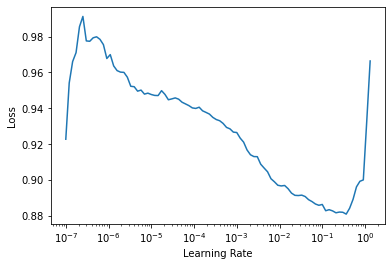

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(3, 3.6e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.755909,0.589905,0.679120,02:19


epoch,train_loss,valid_loss,accuracy,time
0,0.385190,0.445709,0.804740,05:03
1,0.347133,0.398547,0.822020,05:02
2,0.331182,0.539245,0.820450,05:02


In [10]:
learn.show_results()

,text,category,category_
0,xxbos xxunk à ® xxunk ® xxunk ® ¤à ® ¿à ® ° à ® xxunk ® ªà ® xxunk ® xxunk ® xxunk à ® ªà ® xxunk ® ¤à ® xxunk ! à ® xxunk ® xxunk ® ¤à ® ¿à ® ° à ® à¯?à ® à ® xxunk ® ° à ® © xxunk ® à¯?à ® xxunk ? à ® à ® xxunk ® ¿à ® xxunk ? à ® ® à ® à¯?à ® xxunk ? xxunk,4,4
1,"xxbos 65 % , xxmaj what 's xxmaj that xxmaj as a xxmaj grade ? xxmaj yeah , xxmaj we 'll xxmaj share xxmaj some xxmaj stuff i have xxmaj my maths xxup gcse xxmaj tomorrow xxmaj so xxmaj good xxmaj luck to xxmaj both xxmaj of us :| xxmaj lol xxup yes i xxup do ! ! .. xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",4,0
2,"xxbos xxunk xxup someones xxup hacking xxup me ! xxup yestarday xxup it xxup xxunk a xxup bad xxup word xxup and xxup now xxup i m xxup banned , xxup now i xxup ca nt xxup go xxup in xxup cp ! xxup i m xxup lucky xxup because i xxup have xxup three xxup accounts xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0,0
3,xxbos xxunk ! i xxmaj like xxup really xxmaj slept in ! xxmaj this is the 1st for xxmaj me ! xxmaj i m xxmaj normally up at like 8:30am ! xxmaj but i feel xxmaj really xxmaj good xxmaj right xxmaj now ! xxmaj have a xxmaj good xxmaj day ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,4
4,xxbos xxup night xxup twitter … … … xxup for xxup now xxup hehe i xxup really xxup need xxup to xxup get xxunk xxup firend xxup has xxup my xxup the xxup last xxup twilight xxup book xxup and xxup i'am xxup really xxup want xxup to xxup read xxup it xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,0
5,"xxbos xxmaj going to listen to xxmaj all time xxmaj low , xxmaj the xxmaj academy xxmaj is … , xxmaj fall xxmaj out xxmaj boy , xxmaj panic xxmaj at xxmaj the xxmaj disco , and 3oh!3 while on tan . xxmaj but not my back it 's burnt . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0,0
6,xxbos & ' xxunk xxup looks xxup like a xxup hard xxup ass xxup and xxup beckett xxup looks xxup like xxup he xxup has xxup boobs & ' - - xxmaj meghan . ( via inevermenttobrag ) i xxup hate … http : / / tumblr.com / xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0
7,xxbos xxmaj now xxmaj i 'm playing xxmaj sims xxmaj pinball in the xxmaj bang xxmaj back rm if you wanna come in & & chat w / me . http : / / bit.ly / xxmaj xxunk xxmaj and xxmaj cubs are behind 4 - 2 . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,0
8,"xxbos xxmaj well , he xxrep 4 l xxrep 4 o there xxup rb : @djalfy : & ' i love this song @spinningdiscs : xxmaj robin xxmaj thicke ï¿½ xxmaj lost xxmaj without xxmaj you .. @ … ? http : / / blip.fm / xxunk m xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",4,4


## Fine tuning & using custom language model

### Custom language model

In [11]:
dls_lm = TextDataLoaders.from_df(df, is_lm=True, text_col='text', valid_pct=0.2, bs=128)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [12]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos xxunk . xxmaj aww well let me know . xxmaj and no zac zac yet . xxmaj and still pretty sick . xxbos monday monday xxbos xxunk so many apps , and getting xxunk confused xxbos xxmaj finally back home . xxmaj kids all grumpy & & tired ( older ones had an altercation ) , me just tired . xxmaj coffee back on , more housework to be done xxbos","xxunk . xxmaj aww well let me know . xxmaj and no zac zac yet . xxmaj and still pretty sick . xxbos monday monday xxbos xxunk so many apps , and getting xxunk confused xxbos xxmaj finally back home . xxmaj kids all grumpy & & tired ( older ones had an altercation ) , me just tired . xxmaj coffee back on , more housework to be done xxbos @lancearmstrong"
1,", but i value sugar ! xxmaj you should treasure it not devour . xxbos xxunk xxmaj xxunk crashed because of this kind of weather . xxmaj maybe you should focus on driving instead of making a photo xxbos is sad that xxup xxunk has a case a xxup h1n1 . xxbos xxmaj not excited of blowing out another candle today … [ as when i was a kid ! ] xxmaj",but i value sugar ! xxmaj you should treasure it not devour . xxbos xxunk xxmaj xxunk crashed because of this kind of weather . xxmaj maybe you should focus on driving instead of making a photo xxbos is sad that xxup xxunk has a case a xxup h1n1 . xxbos xxmaj not excited of blowing out another candle today … [ as when i was a kid ! ] xxmaj we
2,there are plenty more fish in the sea - trust me i <3 your songs of the day xxbos @tommcfly you will never ever dissapoint fans ! ! … .god ! lol .. i lke it wen u go wrong .. like dougie did at wolverhampton .. good times ! xxbos xxunk xxmaj we 'll miss you xxbos xxmaj at work wishing i were not . i have a sty in my,are plenty more fish in the sea - trust me i <3 your songs of the day xxbos @tommcfly you will never ever dissapoint fans ! ! … .god ! lol .. i lke it wen u go wrong .. like dougie did at wolverhampton .. good times ! xxbos xxunk xxmaj we 'll miss you xxbos xxmaj at work wishing i were not . i have a sty in my left


In [13]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], drop_mult=0.5)

In [14]:
learn.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 3.82 GiB (GPU 0; 15.90 GiB total capacity; 13.87 GiB already allocated; 1.05 GiB free; 14.28 GiB reserved in total by PyTorch)
Exception raised from malloc at /opt/conda/conda-bld/pytorch_1595629395347/work/c10/cuda/CUDACachingAllocator.cpp:272 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x4d (0x7fad4c07077d in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x20626 (0x7fad4c2c8626 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x214f4 (0x7fad4c2c94f4 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #3: <unknown function> + 0x21b81 (0x7fad4c2c9b81 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libc10_cuda.so)
frame #4: at::native::empty_cuda(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x249 (0x7face30b8e39 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #5: <unknown function> + 0xd15c49 (0x7face10d9c49 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #6: <unknown function> + 0xd2fa77 (0x7face10f3a77 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #7: <unknown function> + 0xe450dd (0x7fad174fe0dd in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #8: <unknown function> + 0xe453f7 (0x7fad174fe3f7 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #9: at::empty(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0xfa (0x7fad17608e7a in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #10: at::native::empty_like(at::Tensor const&, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x49e (0x7fad1728709e in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #11: <unknown function> + 0xfe3521 (0x7fad1769c521 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #12: <unknown function> + 0x101ecc3 (0x7fad176d7cc3 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #13: at::empty_like(at::Tensor const&, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x101 (0x7fad175ebf91 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #14: at::Tensor at::native::(anonymous namespace)::host_softmax_backward<at::native::(anonymous namespace)::LogSoftMaxBackwardEpilogue, true>(at::Tensor const&, at::Tensor const&, long, bool) + 0x16c (0x7face280524c in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #15: at::native::log_softmax_backward_cuda(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x8d (0x7face27e051d in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #16: <unknown function> + 0xd038c0 (0x7face10c78c0 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cuda.so)
frame #17: <unknown function> + 0xe6f636 (0x7fad17528636 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #18: at::_log_softmax_backward_data(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x119 (0x7fad175b6aa9 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #19: <unknown function> + 0x2c217ff (0x7fad192da7ff in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #20: <unknown function> + 0xe6f636 (0x7fad17528636 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #21: at::_log_softmax_backward_data(at::Tensor const&, at::Tensor const&, long, at::Tensor const&) + 0x119 (0x7fad175b6aa9 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #22: torch::autograd::generated::LogSoftmaxBackward::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x1d7 (0x7fad191564b7 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #23: <unknown function> + 0x30d1017 (0x7fad1978a017 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #24: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&, std::shared_ptr<torch::autograd::ReadyQueue> const&) + 0x1400 (0x7fad19785860 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #25: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&) + 0x451 (0x7fad19786401 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #26: torch::autograd::Engine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x89 (0x7fad1977e579 in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #27: torch::autograd::python::PythonEngine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x4a (0x7fad1d69e1ba in /opt/conda/envs/fastai/lib/python3.8/site-packages/torch/lib/libtorch_python.so)
frame #28: <unknown function> + 0xc9067 (0x7fad565f9067 in /opt/conda/envs/fastai/lib/python3.8/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6)
frame #29: <unknown function> + 0x76ba (0x7fad58f386ba in /lib/x86_64-linux-gnu/libpthread.so.0)
frame #30: clone + 0x6d (0x7fad58c6e4dd in /lib/x86_64-linux-gnu/libc.so.6)


In [22]:
learn.fit_one_cycle(3, 6.3e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.840947,4.445693,0.224342,85.258980,01:40
1,4.521661,4.313788,0.237592,74.723038,01:40
2,4.275657,4.272072,0.241986,71.670006,01:40


In [23]:
learn.save('3epoch_fit_one_cycle')

In [24]:
learn = learn.load('3epoch_fit_one_cycle')

In [27]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], drop_mult=0.5)
learn.fit_one_cycle(6, 6.3e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.913908,4.432177,0.226114,84.114296,01:40
1,4.619577,4.397346,0.226380,81.234947,01:40
2,4.433048,4.354645,0.234543,77.839172,01:40
3,4.276428,4.312634,0.239191,74.636787,01:40
4,4.129568,4.287622,0.241749,72.793190,01:40
5,4.035867,4.282863,0.243498,72.447533,01:40


In [29]:
learn.save('6epoch_fit_one_cycle')

In [30]:
learn = learn.load('6epoch_fit_one_cycle')

In [31]:
learn.unfreeze()
learn.fit_one_cycle(2, 6.3e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.950136,4.201844,0.255567,66.809425,01:51
1,3.766709,4.191778,0.261114,66.140297,01:51


In [32]:
learn.save('finetuned_2epoch')

In [33]:
learn.save_encoder('finetuned_2epoch_encoder')

It looks like we start to overfit at 3 epochs so let's load the saved encoder from above

In [34]:
TEXT = "WALKING HOME"
N_WORDS = 13
N_SENTENCES = 3
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [35]:
print("\n".join(preds))

WALKING HOME ! i ca nt get there i lost a follower .. i
WALKING HOME SL eeee 3333 !!!! Is watching
WALKING HOME with My Mom My dad wants to go to


## Train the text classifier

In [36]:
dls_clas = TextDataLoaders.from_df(df, valid_col="is_valid", text_col='text', label_col='target', text_vocab=dls_lm.vocab)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [37]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [39]:
learn = learn.load_encoder('finetuned_2epoch_encoder')

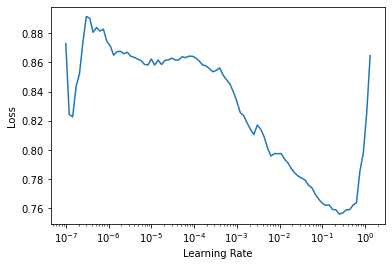

In [47]:
lrs = learn.lr_find()

In [48]:
lrs

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=7.585775847473997e-07)

In [51]:
lr = lrs[0]  #lr_min

In [52]:
learn.fit_one_cycle(9, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.605353,0.502145,0.747700,00:33
1,0.615858,0.497584,0.754350,00:33
2,0.605701,0.483955,0.763400,00:33
3,0.604359,0.485830,0.770500,00:33
4,0.583646,0.486418,0.763950,00:33
5,0.601230,0.486711,0.768900,00:34
6,0.590673,0.469130,0.776300,00:33
7,0.570304,0.466587,0.778100,00:33
8,0.589068,0.465756,0.778350,00:33


In [57]:
learn.save('9epoch_model')

In [54]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(lr/500,lr/10))

epoch,train_loss,valid_loss,accuracy,time
0,0.500032,0.446057,0.791950,00:38


In [56]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(lr/5000,lr/100))

epoch,train_loss,valid_loss,accuracy,time
0,0.481644,0.439307,0.794050,00:55


In [58]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(lr/50000,lr/5000))

epoch,train_loss,valid_loss,accuracy,time
0,0.481711,0.438719,0.794750,01:15
1,0.481699,0.438015,0.794250,01:15


In [59]:
learn.show_results()

,text,category,category_
0,xxbos xxmaj it 's xxmaj been a xxmaj while … xxmaj but i xxmaj been xxmaj busy ! ! xxmaj xxunk xxmaj tha xxmaj show … xxmaj now xxmaj i 'm xxmaj celebrating ! ! xxmaj i 'm xxmaj ur 2009 xxmaj mr . xxmaj muscle xxmaj beach xxrep 3 ! i xxmaj took xxmaj tha xxmaj show xxmaj baby xxrep 3 !,4,4
1,"xxbos xxmaj i 'm still bummed about today . i need to channel the xxmaj p!nk in me . xxup so xxup what ! xxup i 'm xxup still a xxup rock xxup star ! i xxup got xxup my xxup rock xxup moves , xxup and i xxup do n't xxup need xxup you xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0,0
2,xxbos xxup just xxup got xxup back xxup from xxup cedar xxup point xxup in xxup oh . xxup lil xxup road xxup trip xxup for xxup da xxup fam xxup rode xxup every xxup thing xxup uno xxup g 's xxup ai nt xxup scared xxup of xxup no xxup roller xxup coaster xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0
3,xxbos xxmaj talking xxmaj to xxmaj alyssa and xxmaj chillin out .. going xxmaj through xxmaj pictures xxmaj my xxmaj xxunk ( ( xxunk ) ) xxmaj sent xxmaj mee xxmaj oh xxup yea ! xxmaj lol xxmaj but xxmaj anyway … i xxmaj miss xxmaj my xxmaj xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,0
4,xxbos xxmaj listening to & ' do n't xxmaj cry & ' by xxmaj new xxmaj kids xxmaj on xxmaj the xxmaj block ( nkotb ) . it 's the perfect song right now . xxmaj what other sad love song is there ? xxmaj let 's see . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,4
5,"xxbos xxmaj i 'm back xxrep 3 ! xxmaj i 'm # alive & & # kicking ! xxmaj no xxunk , no xxunk ! xxmaj xxunk * in one piece * xxup jb was … overrated . xxmaj but had a great time with my ladies ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",4,4
6,"xxbos xxmaj this is a xxunk cool mix ! xxmaj ca n't say xxmaj i 'm much of a xxmaj peaches geek , but i really dig this xxunk and that & ' i , xxmaj you … ? http : / / blip.fm / xxunk xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",4,4
7,"xxbos xxmaj i 'm tired of the sun . xxmaj it 's not going away for days yet , but xxmaj i 'm done with it . xxmaj where can i go to escape ? xxmaj sad , it 's only in the mid 70 's xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad",0,0
8,xxbos xxmaj xxunk night of my spring xxrep 3 ! & ' niggas dnt know how 2 act & ' is an under - statement ma xxrep 3 n xxrep 4 ! xxmaj hahaha xxmaj i m a def laugh till my stomach hurt ! ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0


In [60]:
learn.save('final_classifier')

In [61]:
learn.export('final_classifier.pkl')

In [62]:
learn = learn.load('final_classifier')

## Making and evaluating predictions

In [1]:
preds = learn.get_preds()

NameError: name 'learn' is not defined

In [6]:
??learn.get_preds()

Object `learn.get_preds()` not found.


In [37]:
preds[0][:4]

tensor([[0.0264, 0.9736],
        [0.7726, 0.2274],
        [0.6149, 0.3851],
        [0.8241, 0.1759]])

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

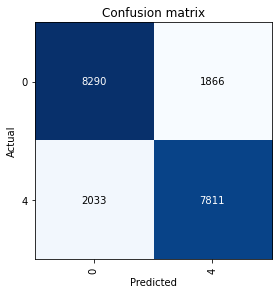

In [39]:
interp.plot_confusion_matrix()

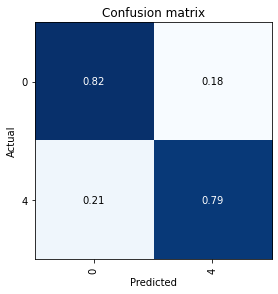

In [40]:
interp.plot_confusion_matrix(normalize='true')

In [41]:
losses = interp.top_losses()

In [42]:
len(losses[1])

20000

In [43]:
df_losses = pd.DataFrame({'loss': losses[0],
                         'index': losses[1]})

In [44]:
df_losses.head()

,loss,index
0,7.087475,10224
1,6.995491,4931
2,6.733932,2312
3,6.043075,13923
4,5.963931,17645


In [45]:
df_toplosses = interp.plot_top_losses(200)

,input,target,predicted,probability,loss
0,xxbos my hoodie has ears xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9991644620895386,7.087475299835205
1,xxbos i miss you sis xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9990839958190918,6.995491027832031
2,xxbos xxunk cool ! thank you thank you xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,4,0.9988101720809937,6.733932018280029
3,xxbos xxunk sorry about it xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9976257681846619,6.043074607849121
4,xxbos just woke up wondering why my itunes wo nt play songs and why my printer went spaz at four this morning .. xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.997430145740509,5.963930606842041
5,xxbos not going to school sick xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9960923790931702,5.544837474822998
6,xxbos last day of highschool tomorrow xxrep 4 ! so sad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9959447979927063,5.507761001586914
7,xxbos i wish i was in xxmaj california right now . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9941925406455994,5.148614406585693
8,xxbos i wish i was on an island . xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,4,0,0.9926954507827759,4.919257640838623
9,xxbos xxmaj good xxmaj bye xxmaj new xxmaj york ! xxup nyc was amazing ! xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad xxpad,0,4,0.9924501180648804,4.886213779449463


In [46]:
top_200losses = df_losses[0:200]

In [47]:
top_200losses.merge(df_toplosses, on='loss')

TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed

In [48]:
valid = dls_clas.valid.items

In [49]:
valid = valid[['text', 'is_valid', 'target']]

In [50]:
valid.head()

,text,is_valid,target
1,"[xxbos, xxmaj, making, pasta, and, insalata, blu, with, mom]",True,4
2,"[xxbos, xxmaj, worst, ., xxmaj, day, ., xxmaj, ever, ., xxmaj, needing, some, legitimate, hug, action, ., xxmaj, show, starts, in, 30]",True,0
13,"[xxbos, @honnydipp, oh, no, today, is, not, a, good, day, ., xxmaj, aw, doll]",True,0
14,"[xxbos, grr, boys, annoy, the, shit, out, of, me, ,, why, ca, nt, i, just, hang, with, mah, girls, all, the, time]",True,4
31,"[xxbos, xxup, fuck, xxup, you, xxup, lord, xxup, of, xxup, the, xxup, flies, i, xxup, hate, xxup, you, -, bubbleant, :, xxup, o.o, xxmaj, you, hate, it, ?, !, i, loved, it, !, lol, xxmaj, but, i, read, it, a, long, …, http, :, /, /, tumblr.com, /, xbw1t3cwz]",True,4


In [51]:
valid[l] = valid.assign(prediction=pd.Series(preds[1]))

NameError: name 'l' is not defined

In [52]:
valid = valid.assign(prediction=pd.Series(preds[1]))

In [53]:
valid = valid.assign(probability_0=Series(preds[0]))

NameError: name 'Series' is not defined

In [54]:
valid = valid.assign(probability_0=Series(preds[0]))

NameError: name 'Series' is not defined

In [55]:
max(preds[0][0])

tensor(0.9736)

In [56]:
preds[0][0]

tensor([0.0264, 0.9736])

In [57]:
most_confused = interp.most_confused()

In [58]:
most_confused #actual, predicted, no of ocurences

[(4, 0, 2033), (0, 4, 1866)]

In [59]:
report = interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     10156
           4       0.81      0.79      0.80      9844

    accuracy                           0.81     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [147]:
?? ClassificationInterpretation.plot_top_losses